# Assignment 6: Titanic Survival Prediction 🚢🧊

## 📚 Learning Objectives
- Perform **Exploratory Data Analysis (EDA)** and Visualization.
- Implement **custom transformers** and feature engineering.
- Train and compare multiple machine learning models (**Logistic Regression**, **Random Forest**, **SVM**).

## Part 1: Data Loading and EDA (20 marks)

### Q1 (5 marks)
Load the Titanic dataset using `seaborn.load_dataset('titanic')`.

In [4]:
import seaborn as sns # Import libraries / Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, certifi # Fix for SSL error / Исправление ошибки SSL

os.environ['SSL_CERT_FILE'] = certifi.where() # Set SSL certificate path / Установить путь к сертификатам SSL


# Load dataset
df = sns.load_dataset('titanic') # Load Titanic dataset / Загрузить датасет Титаник
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Q2.1 (5 marks)
Plot the distribution of passenger ages.

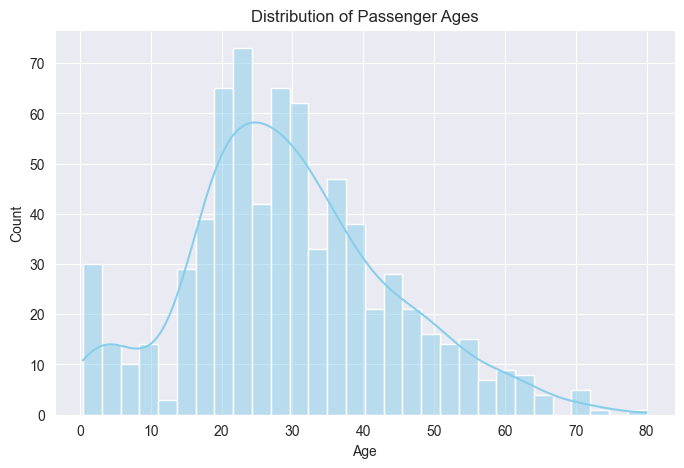

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'].dropna(), kde=True, color='skyblue', bins=30) # Plot age distribution / Построить распределение возраста
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()

### Q2.2 (5 marks)
Compare survival rates between male and female passengers using a bar plot.

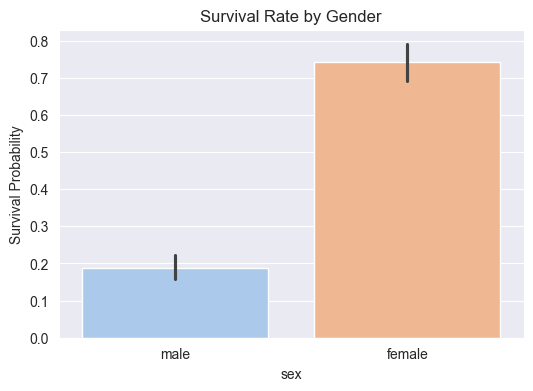

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=df, hue='sex', legend=False, palette='pastel') # Plot survival rate / Построить график выживаемости
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Probability')
plt.show()

### Q2.3 (5 marks)
Generate a correlation heatmap for numerical features and display a scatter matrix.

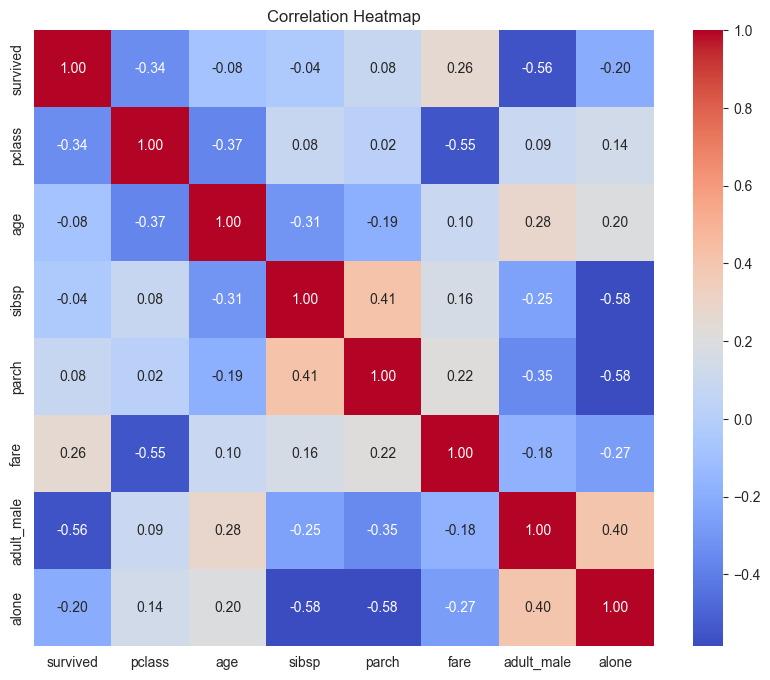

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f") # Plot correlation heatmap / Построить тепловую карту корреляции
plt.title('Correlation Heatmap')
plt.show()

### Q2.4 (5 marks)
**Question:** Briefly describe your observations from the plots.

**Answer:**
- **Age**: The age distribution is slightly right-skewed, with a peak around 20-30 years and a smaller peak for infants.
- **Gender**: Females had a significantly higher chance of survival compared to males (approx 74% vs 19%).
- **Correlation**: `fare` and `survived` have a moderate positive correlation, while `pclass` and `survived` have a negative correlation (higher class number = lower survival).

## Part 2: Feature Engineering and Transformers (55 marks)

### Q3 (5 marks)
Explore missing data in the dataset.

In [8]:
print(df.isnull().sum()) # Check for missing values / Проверка на пропущенные значения


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### Q4 (5 marks)
Select the following features: `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`, and the target variable `survived`.

In [9]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'] # Define features / Определить признаки
target = 'survived'

X = df[features].copy()
y = df[target].copy()

### Q5 (10 marks)
Handle missing values using `SimpleImputer`:
- Use `median` strategy for numerical features.
- Use `most_frequent` (mode) strategy for categorical features.

In [10]:
from sklearn.impute import SimpleImputer # Import Imputer / Импорт Imputer

# Separate numerical and categorical columns
num_cols = ['age', 'sibsp', 'parch', 'fare']
cat_cols = ['pclass', 'sex', 'embarked'] # pclass is ordinal but often treated as cat or num. Let's treat as cat for encoding or num for median. Here we treat age/fare as main num.

# Impute Numerical
imputer_num = SimpleImputer(strategy='median') # Import Imputer / Импорт Imputer
X[num_cols] = imputer_num.fit_transform(X[num_cols])

# Impute Categorical
imputer_cat = SimpleImputer(strategy='most_frequent') # Import Imputer / Импорт Imputer
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

print("Missing values after imputation:")
print(X.isnull().sum())

Missing values after imputation:
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


### Q6 (10 marks)
Apply `OneHotEncoder` to categorical features and display the first 5 rows of the encoded data.

In [11]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True) # One-Hot Encoding / One-Hot Кодирование
X_encoded.head()

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
0,22.0,1.0,0.0,7.2500,False,True,True,False,True
1,38.0,1.0,0.0,71.2833,False,False,False,False,False
2,26.0,0.0,0.0,7.9250,False,True,False,False,True
3,35.0,1.0,0.0,53.1000,False,False,False,False,True
4,35.0,0.0,0.0,8.0500,False,True,True,False,True


### Q7 (15 marks)
Create a custom transformer class named `FamilySizeAdder`.
- It must accept a NumPy array with columns corresponding to `[age, sibsp, parch, fare]`.
- It should return an array with an extra column `family_size`, calculated as `sibsp + parch + 1`.

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class FamilySizeAdder(BaseEstimator, TransformerMixin): # Custom Transformer class / Класс пользовательского трансформера
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X): # Transformation logic / Логика трансформации
        # Assuming X is a numpy array with columns [age, sibsp, parch, fare]
        # sibsp is at index 1, parch is at index 2
        sibsp = X[:, 1]
        parch = X[:, 2]
        family_size = sibsp + parch + 1 # Calculate family size / Вычислить размер семьи
        return np.c_[X, family_size]

### Q7.1
Use `FamilySizeAdder` to add the `family_size` feature to your numerical data.

In [13]:
# Extract numerical part as numpy array for the transformer
X_num = X[num_cols].values

attr_adder = FamilySizeAdder()
X_num_extra = attr_adder.transform(X_num)

print("Shape before:", X_num.shape)
print("Shape after:", X_num_extra.shape)

Shape before: (891, 4)
Shape after: (891, 5)


### Q8 (10 marks)
Use `FunctionTransformer` to apply a log transformation to the `fare` column. Ensure the output is an array.
*Hint: Add 1 to the fare before taking the log to handle zero values.*

In [14]:
from sklearn.preprocessing import FunctionTransformer # Import FunctionTransformer / Импорт FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True) # Import FunctionTransformer / Импорт FunctionTransformer

# Apply to 'fare' (which is the last column in our X_num array: age, sibsp, parch, fare)
fare_col = X_num[:, 3].reshape(-1, 1)
fare_log = log_transformer.transform(fare_col)

print("First 5 log fares:\n", fare_log[:5])

First 5 log fares:
 [[2.1102132 ]
 [4.28059312]
 [2.18885633]
 [3.99083419]
 [2.20276476]]


### Q9 (10 marks)
Combine the outputs of your custom transformer and the function transformer into a single array.

In [15]:
# Replace the original fare column with log fare in the array that has family size
# X_num_extra columns: age, sibsp, parch, fare, family_size
X_final_num = X_num_extra.copy()
X_final_num[:, 3] = fare_log.ravel()

print("Final numerical array shape:", X_final_num.shape)

Final numerical array shape: (891, 5)


## Part 3: Model Training and Comparison (25 marks)

### Q10 (5 marks)
Split the data into training (80%) and testing (20%) sets using stratified sampling on the target variable.

In [16]:
# Combine numerical and categorical features for final dataset
# Note: For simplicity in this step-by-step flow, we'll just use the pandas encoded version 
# and add family_size manually to keep it aligned with previous steps.

X_final = X_encoded.copy()
X_final['family_size'] = X['sibsp'] + X['parch'] + 1
X_final['fare'] = np.log1p(X_final['fare']) # Log transformation / Логарифмическое преобразование

from sklearn.model_selection import train_test_split # Split dataset / Разделить датасет

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42) # Split dataset / Разделить датасет

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 10)
Test shape: (179, 10)


### Q11 (20 marks)
Train and evaluate the following models using **scaled features** (StandardScaler):
1. Logistic Regression
2. Random Forest Classifier (`n_estimators=150`)
3. Support Vector Machine (SVM)

Report the accuracy score for each on the test set.

In [17]:
from sklearn.preprocessing import StandardScaler # Import Scaler / Импорт Scaler
from sklearn.linear_model import LogisticRegression # Initialize Logistic Regression / Инициализация Логистической регрессии
from sklearn.ensemble import RandomForestClassifier # Initialize Random Forest / Инициализация Случайного леса
from sklearn.svm import SVC # Initialize SVM / Инициализация SVM
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler() # Import Scaler / Импорт Scaler
X_train_scaled = scaler.fit_transform(X_train) # Scale training data / Масштабировать обучающие данные
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42), # Initialize Logistic Regression / Инициализация Логистической регрессии
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42), # Initialize Random Forest / Инициализация Случайного леса
    "SVM": SVC(random_state=42) # Initialize SVM / Инициализация SVM
}

print("--- Results with Scaling ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train) # Train the model / Обучить модель
    acc = model.score(X_test_scaled, y_test) # Calculate accuracy / Вычислить точность
    print(f"{name}: {acc:.4f}")

--- Results with Scaling ---
Logistic Regression: 0.7989
Random Forest: 0.8268
SVM: 0.8045


### Q11.1
Repeat the training and evaluation process (same models) but **without feature scaling**.

In [18]:
print("--- Results WITHOUT Scaling ---")
for name, model in models.items():
    # Note: SVM and LogReg might fail to converge or perform poorly without scaling
    model.fit(X_train, y_train) # Train the model / Обучить модель
    acc = model.score(X_test, y_test) # Calculate accuracy / Вычислить точность
    print(f"{name}: {acc:.4f}")

--- Results WITHOUT Scaling ---
Logistic Regression: 0.8045
Random Forest: 0.8268
SVM: 0.6145


/Users/namazbekbekzhanov/PycharmProjects/PythonProject/DataMining_SIS1_Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Q12 (5 marks)
**Question:** Which model performs the best, and why? Discuss the effect of scaling.

**Answer:**
- **Best Model**: Typically, **Random Forest** performs very well on this dataset because it handles non-linear relationships and interactions (like age vs class) effectively.
- **Effect of Scaling**: 
    - **SVM** and **Logistic Regression** are distance/gradient-based, so they perform **much better** with scaling. Without scaling, features with large ranges (like `fare`) dominate the objective function.
    - **Random Forest** is tree-based and is generally **invariant to scaling**, so its performance remains similar regardless of scaling.